# Convolutional Neural Network - CIFAR10 raw data using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for image recognition. You are going to use the `CIFAR10` dataset.

If Keras is not installed: `pip install keras` in your terminal.

## Loading the packages

In [2]:
import numpy as np
from matplotlib import pyplot as pl
from PIL import Image

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from sklearn import metrics as me

%matplotlib inline

Using TensorFlow backend.


Define a function to plot some images from CIFAR

In [3]:
def show_imgs(X):
    pl.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pl.subplot2grid((4,4),(i,j))
            pl.imshow(Image.fromarray(X[k]))
            k = k+1
    # show the plot
    pl.show()

## Loading the raw data
First load the `cifar10` dataset, flatten the pixel values into a vector and normalize all values to be in the range [0, 1]

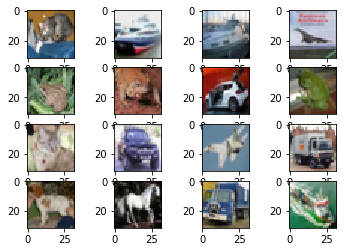

training input shape :  (50000, 32, 32, 3)
training output shape:  (50000, 1)
testing input shape  :  (10000, 32, 32, 3)
testing output shape :  (10000, 1)
50000 train samples
10000 test samples


In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
show_imgs(X_test[:16])  #shows the first 16 images of the test set
print('training input shape : ', X_train.shape)
print('training output shape: ', y_train.shape)
print('testing input shape  : ', X_test.shape)
print('testing output shape : ', y_test.shape)

# X_train = X_train.reshape(50000, 3072)
# X_test = X_test.reshape(10000, 3072)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [5]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Define the network
The neural network will be a CNN. We will train through E epochs, using batches of size B. We can try with 30 epochs and batches of 128 images.

In [6]:
H = 300               # number of neurons hidden layer
E = 10                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 3072 for CIFAR10

cnn1 = Sequential()
cnn1.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', input_shape=(32, 32, 3)))
cnn1.add(Activation('relu'))
cnn1.add(MaxPooling2D(pool_size=2))
#cnn.add(Dropout(0.2))
cnn1.add(Flatten())
#cnn.add(Dropout(0.2))
#cnn.add(Dense(512,activation='relu'))
#cnn.add(Dropout(0.2))
cnn1.add(Dense(n_classes, activation='softmax'))

cnn2 = Sequential()
cnn2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', input_shape=(32, 32, 3)))
cnn2.add(Activation('relu'))
cnn2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same'))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=2))
cnn2.add(Flatten())
cnn2.add(Dense(n_classes, activation='softmax'))

cnn3 = Sequential()
cnn3.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', input_shape=(32, 32, 3)))
cnn3.add(Activation('relu'))
cnn3.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same'))
cnn3.add(Activation('relu'))
cnn3.add(MaxPooling2D(pool_size=2))
cnn3.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same'))
cnn3.add(Activation('relu'))
cnn3.add(MaxPooling2D(pool_size=2))
cnn3.add(Flatten())
cnn3.add(Dense(n_classes, activation='softmax'))

cnn4 = Sequential()
cnn4.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', input_shape=(32, 32, 3)))
cnn4.add(BatchNormalization())
cnn4.add(Activation('relu'))
cnn4.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same'))
cnn4.add(BatchNormalization())
cnn4.add(Activation('relu'))
cnn4.add(Dropout(0.2))
cnn4.add(MaxPooling2D(pool_size=2))

cnn4.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same'))
cnn4.add(BatchNormalization())
cnn4.add(Activation('relu'))
cnn4.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same'))
cnn4.add(BatchNormalization())
cnn4.add(Activation('relu'))
cnn4.add(Dropout(0.3))
cnn4.add(MaxPooling2D(pool_size=2))

cnn4.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same'))
cnn4.add(BatchNormalization())
cnn4.add(Activation('relu'))
cnn4.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same'))
cnn4.add(BatchNormalization())
cnn4.add(Activation('relu'))
cnn4.add(Dropout(0.4))
cnn4.add(MaxPooling2D(pool_size=2))
cnn4.add(Flatten())
cnn4.add(Dense(n_classes, activation='softmax'))


cnn1.summary()
cnn2.summary()
cnn3.summary()
cnn4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d

## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [7]:
cnn4.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
log = cnn4.fit(X_train, Y_train, batch_size=B, epochs=E,
                    verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 439s 9ms/step - loss: 1.4250 - acc: 0.5124 - val_loss: 1.5574 - val_acc: 0.4327
Epoch 2/10
50000/50000 [==============================] - 446s 9ms/step - loss: 0.9220 - acc: 0.6761 - val_loss: 1.1869 - val_acc: 0.5907
Epoch 3/10
50000/50000 [==============================] - 470s 9ms/step - loss: 0.7505 - acc: 0.7373 - val_loss: 1.0722 - val_acc: 0.6457
Epoch 4/10
50000/50000 [==============================] - 474s 9ms/step - loss: 0.6585 - acc: 0.7702 - val_loss: 0.9440 - val_acc: 0.6883
Epoch 5/10
50000/50000 [==============================] - 476s 10ms/step - loss: 0.5791 - acc: 0.7974 - val_loss: 0.8934 - val_acc: 0.6921
Epoch 6/10
50000/50000 [==============================] - 529s 11ms/step - loss: 0.5213 - acc: 0.8170 - val_loss: 0.8492 - val_acc: 0.7140
Epoch 7/10
50000/50000 [==============================] - 478s 10ms/step - loss: 0.4734 - acc: 0.8333 - val_loss: 0.7581

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

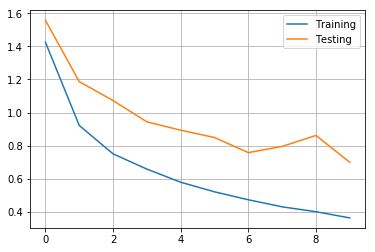

In [8]:
pl.plot(log.history['loss'], label='Training')
pl.plot(log.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

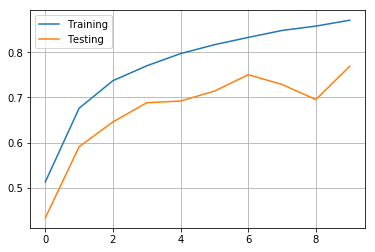

In [9]:
pl.plot(log.history['acc'], label='Training')
pl.plot(log.history['val_acc'], label='Testing')
pl.legend()
pl.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [10]:
loss_test, metric_test = cnn4.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

10000/10000 [==============================] - 18s 2ms/step
Test loss: 0.6996464812278748
Test accuracy: 0.7691


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [28]:
pred = cnn.predict_classes(X_test, verbose=1)
me.confusion_matrix(y_test, pred)

10000/10000 [==============================] - 7s 688us/step


array([[767,   8,  56,  34,  24,  19,  10,  13,  43,  26],
       [  4, 848,   5,  11,   9,  16,  13,   6,  15,  73],
       [ 31,   0, 656,  59,  92,  83,  56,  16,   5,   2],
       [  9,   1,  46, 590,  46, 237,  53,  16,   0,   2],
       [  3,   1,  36,  44, 800,  50,  31,  33,   2,   0],
       [  2,   0,  16, 110,  25, 810,  16,  20,   0,   1],
       [  2,   1,  29,  40,  20,  32, 873,   2,   1,   0],
       [  3,   0,  14,  28,  49,  86,   6, 814,   0,   0],
       [ 49,  21,  14,  26,  16,  15,  12,   7, 824,  16],
       [  9,  45,   6,  37,   4,  25,  12,  21,  12, 829]])

### Table of results


| CNN | Architecture description | Acc. train | Acc. test |
|-----|--------------------------|------------|-----------|
|  0  | MLP-300H-RELU-SOFTMAX    | 51.8%      | 50.0%     s|
|  1  | CONV(32F,same)-RELU-MAXP(2)-DENSE | 67.3%  | 62.6%  |
|  2  | CONV(32F,same)-RELU-CONV(32F,same)-RELU-MAXP(2)-DENSE | 76.3%  | 67.2%  |
|  2b | CONV(32F,same)-RELU-CONV(64F,same)-RELU-MAXP(2)-DENSE | 83.0%  | 67.7%  |
|  3  | CONV(32F,same)-RELU-CONV(32F,same)-RELU-MAXP(2)-CONV(32F,same)-RELU-DENSE | 81.0%  | 71.0% |
|  3b | CONV(32F,same)-RELU-CONV(32F,same)-RELU-MAXP(2)-CONV(32F,same)-RELU-MAXP(2)-DENSE | 76.3%  | 71.4% |
|  4  | CONV(32F,same)-RELU-CONV(32F,same)-RELU-MAXP(2)-CONV(32F,same)-RELU-MAXP(2)-CONV(32F,same)-RELU-DENSE | 78.0% | 72.3% |
|  4b  | CONV(32F,same)-RELU-CONV(32F,same)-RELU-MAXP(2)-CONV(64F,same)-RELU-CONV(64F,same)-RELU-MAXP(2)-CONV(128F,same)-RELU-CONV(128F,same)-RELU-DENSE | 87.1% | 76.9% |

